In [2]:
import pandas as pd
import sklearn
import numpy as np

<h1> My project is about salary in fields Data Science and AI
<h1> I want to predict what salary can I expect in
<h1> entry level job in this field


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


work_year: The year the salary was paid.

experience_level: The experience level in the job during the year.

EN > Entry-level / Junior

MI > Mid-level / Intermediate

SE > Senior-level / Expert

EX > Executive-level / Director

employment_type: The type of employment for the role.

PT > Part-time

FT > Full-time

CT > Contract

FL > Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD.

employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

remote_ratio:The overall amount of work done remotely.

company_location: The country of the employer's main office or contracting branch.

company_size: The median number of people that worked for the company during the year.

In [5]:
data.groupby("work_year").size()

work_year
2020      76
2021     230
2022    1664
2023    1785
dtype: int64

In [6]:
data[["salary_in_usd"]].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


In [7]:
data.groupby("job_title").size()

job_title
3D Computer Vision Researcher      4
AI Developer                      11
AI Programmer                      2
AI Scientist                      16
Analytics Engineer               103
                                ... 
Research Engineer                 37
Research Scientist                82
Software Data Engineer             2
Staff Data Analyst                 1
Staff Data Scientist               1
Length: 93, dtype: int64

<h2>In this dataset can see many jobs that we are not interested in. So I choose to only left Ai specific and data scienctists jobs.

<h2>Also we only interested in entry-level jobs.

<h2>And we need only salary in usd to be consistent

In [47]:
juniorDSAndAi = data[((data['job_title'].str.contains('AI')) | (data['job_title'] == 'Data Scientist') | (data['job_title'].str.contains('Machine Learning')))
                      &
                     (data['experience_level'].str.contains('EN'))]
juniorDSAndAi = juniorDSAndAi.drop(["experience_level", 'salary', 'salary_currency'], axis=1)
juniorDSAndAi

,work_year,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
83,2022,FT,AI Developer,300000,IN,50,IN,L
95,2023,FT,Machine Learning Engineer,163196,US,0,US,M
96,2023,FT,Machine Learning Engineer,145885,US,0,US,M
114,2022,FT,Machine Learning Engineer,56536,CH,100,CH,S
327,2023,FT,Data Scientist,51753,CA,100,CA,L
...,...,...,...,...,...,...,...,...
3708,2020,FT,Data Scientist,62726,DE,50,DE,S
3710,2020,PT,Data Scientist,21669,IT,50,IT,S
3729,2021,FT,AI Scientist,18053,IN,100,AS,S
3735,2021,PT,AI Scientist,12000,BR,100,US,S


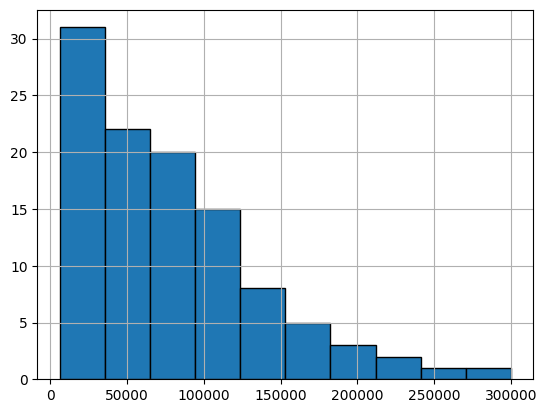

In [50]:
hist = juniorDSAndAi['salary_in_usd'].hist(edgecolor='black')

In [51]:
juniorDSAndAi.groupby("job_title").size()

job_title
AI Developer                           6
AI Programmer                          2
AI Scientist                           7
Applied Machine Learning Scientist     2
Data Scientist                        59
Machine Learning Developer             5
Machine Learning Engineer             21
Machine Learning Research Engineer     3
Machine Learning Scientist             2
Machine Learning Software Engineer     1
dtype: int64

Here we can see, that most of the jobs are data scientist related

In [52]:
juniorDSAndAi[["salary_in_usd"]].describe()

,salary_in_usd
count,108.000000
mean,78009.833333
std,58579.672625
min,6304.000000
25%,32630.000000
50%,68096.000000
75%,105750.000000
max,300000.000000


<h2>We going to deside is the salary a high salary by estimating if it's bigger then mean

In [65]:
mean = 78000
juniorDSAndAi['high_salary'] = juniorDSAndAi['salary_in_usd'] >= mean
juniorDSAndAi

,work_year,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,high_salary
83,2022,FT,AI Developer,300000,IN,50,IN,L,True
95,2023,FT,Machine Learning Engineer,163196,US,0,US,M,True
96,2023,FT,Machine Learning Engineer,145885,US,0,US,M,True
114,2022,FT,Machine Learning Engineer,56536,CH,100,CH,S,False
327,2023,FT,Data Scientist,51753,CA,100,CA,L,False
...,...,...,...,...,...,...,...,...,...
3708,2020,FT,Data Scientist,62726,DE,50,DE,S,False
3710,2020,PT,Data Scientist,21669,IT,50,IT,S,False
3729,2021,FT,AI Scientist,18053,IN,100,AS,S,False
3735,2021,PT,AI Scientist,12000,BR,100,US,S,False


In [66]:
juniorDSAndAi.groupby("high_salary").size()

high_salary
False    60
True     48
dtype: int64

In [67]:
X = juniorDSAndAi.drop(['high_salary', 'salary_in_usd', 'work_year'], axis = 1)
from pandas import get_dummies
X = get_dummies(X)
y = juniorDSAndAi['high_salary']

<h2>Now we are going to train AI to recognize how to expect a high salary

In [61]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=2)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                 shuffle=True, random_state=5)

EVALUATION OF DECISION TREE ON TRAINING SET:
              precision    recall  f1-score   support

       False       0.92      0.95      0.94        38
        True       0.94      0.91      0.93        34

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72

EVALUATION OF DECISION TREE ON TESTING SET:
              precision    recall  f1-score   support

       False       0.78      0.82      0.80        22
        True       0.69      0.64      0.67        14

    accuracy                           0.75        36
   macro avg       0.74      0.73      0.73        36
weighted avg       0.75      0.75      0.75        36



Text(0.5, 1.0, 'Testing Set')

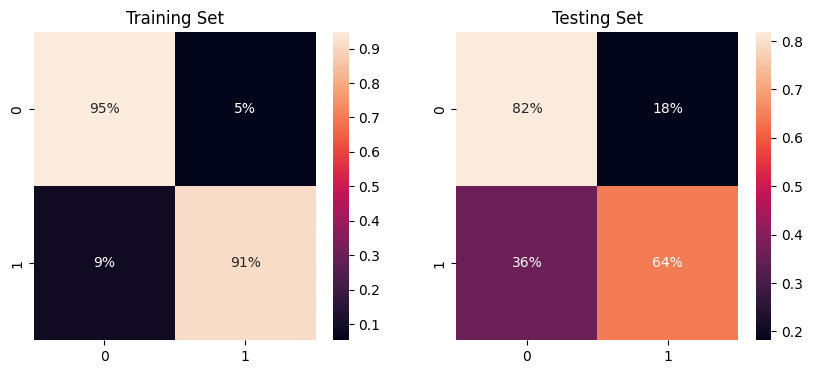

In [63]:
from sklearn.tree import DecisionTreeClassifier

modelD = DecisionTreeClassifier(max_depth=6)

training = modelD.fit(X_train, y_train)   # training of a model
y_train_pred = modelD.predict(X_train)    # apply model for train prediction

print("EVALUATION OF DECISION TREE ON TRAINING SET:")
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

y_test_pred = modelD.predict(X_test)    # apply model for train prediction
print("EVALUATION OF DECISION TREE ON TESTING SET:")
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred, normalize='true')
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, normalize='true')

sns.heatmap(confusion_matrix_train, annot=True, fmt='.0%', ax=ax1)
ax1.set_title('Training Set')

sns.heatmap(confusion_matrix_test, annot=True, fmt='.0%', ax=ax2)
ax2.set_title('Testing Set')

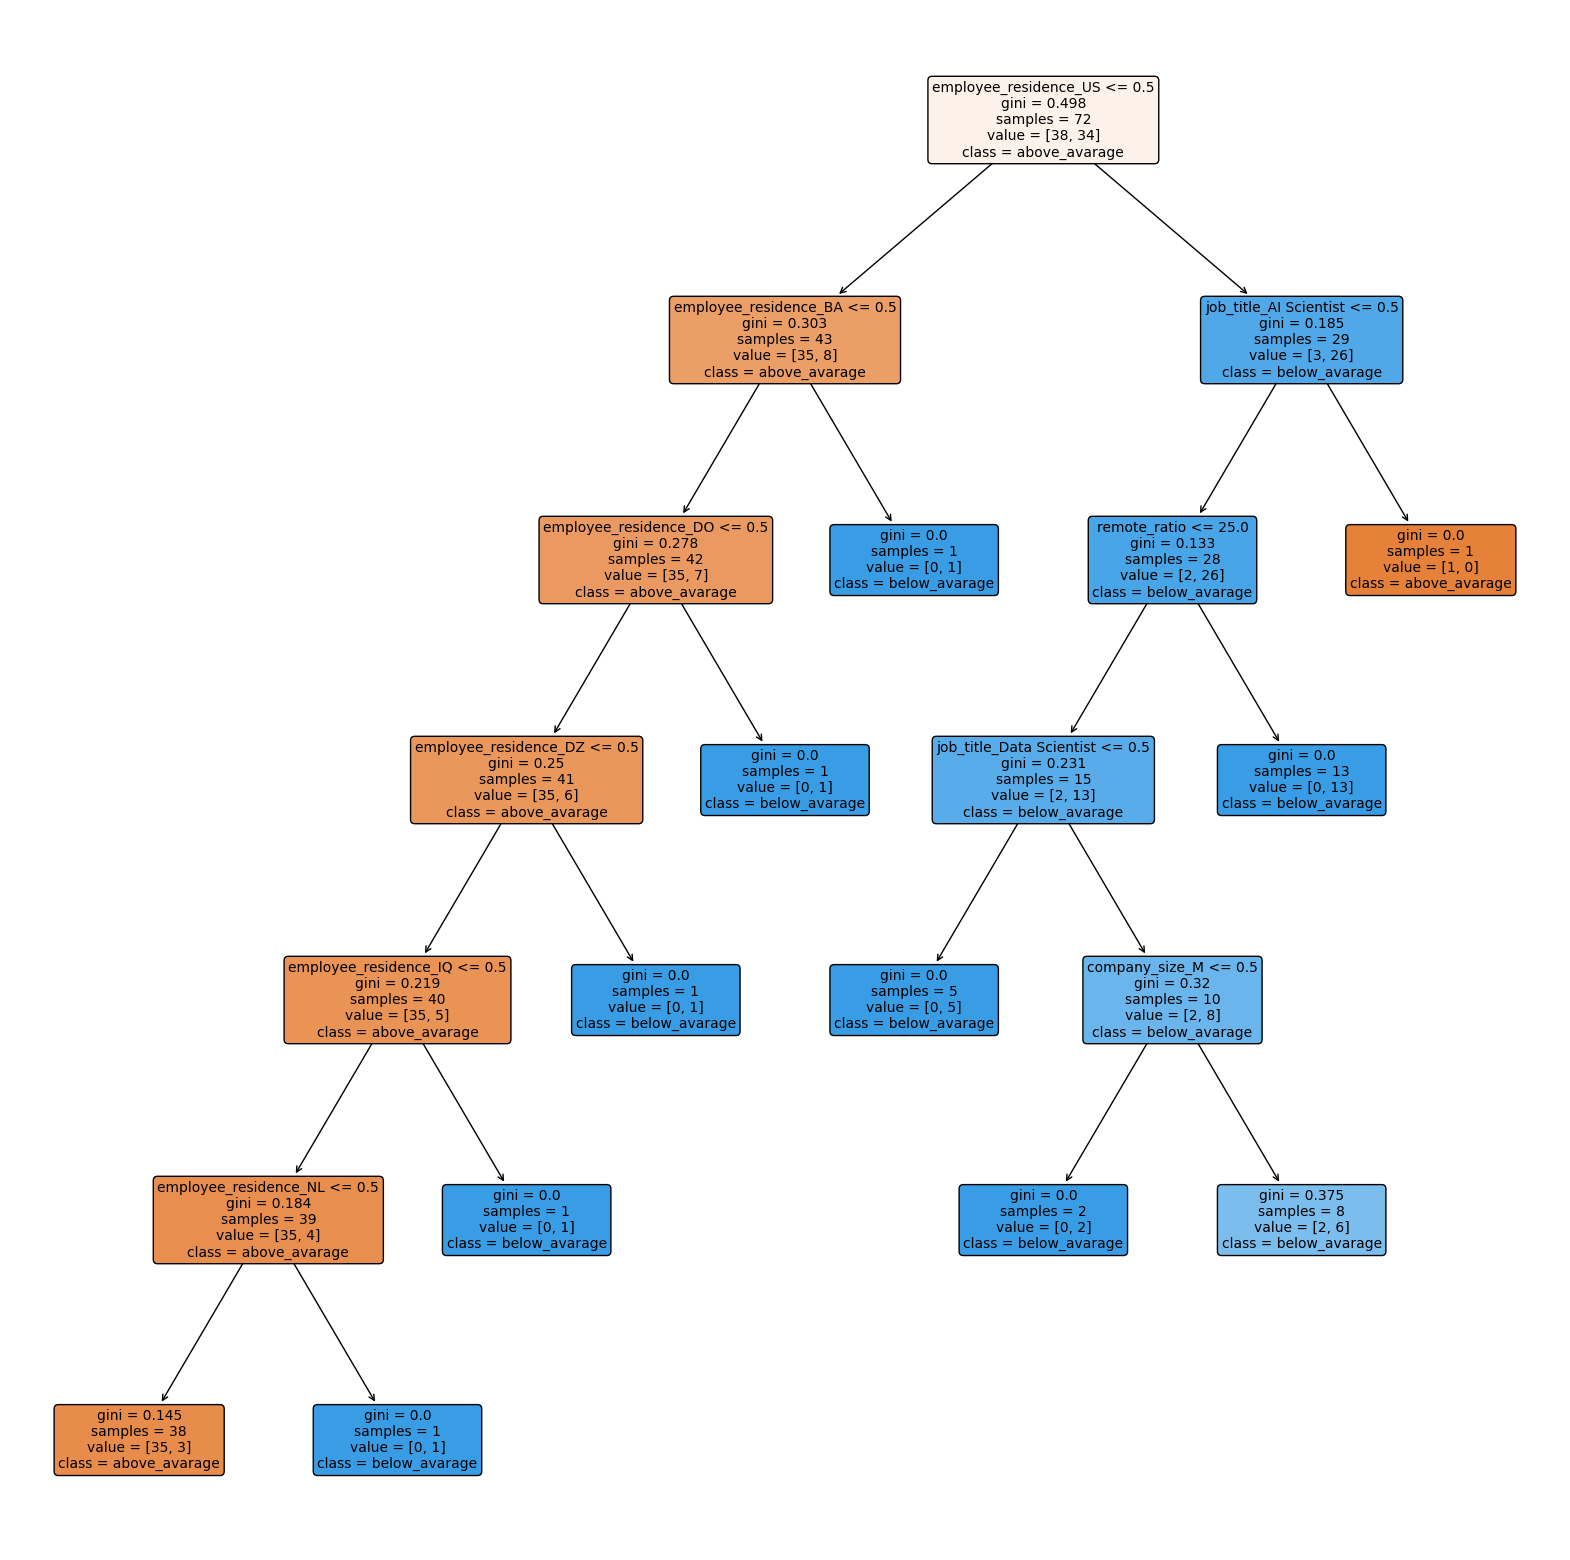

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features = X.columns.values.tolist()
classes=['above_avarage', 'below_avarage']
plt.figure(figsize=(20,20))
plot_tree(modelD, filled=True, feature_names=features, class_names=classes, rounded=True, fontsize=10)
# Display the chart
plt.show()

EVALUATION OF DECISION TREE ON TRAINING SET:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        38
        True       0.94      1.00      0.97        34

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

EVALUATION OF DECISION TREE ON TESTING SET:
              precision    recall  f1-score   support

       False       0.79      0.86      0.83        22
        True       0.75      0.64      0.69        14

    accuracy                           0.78        36
   macro avg       0.77      0.75      0.76        36
weighted avg       0.78      0.78      0.77        36



Text(0.5, 1.0, 'Testing Set')

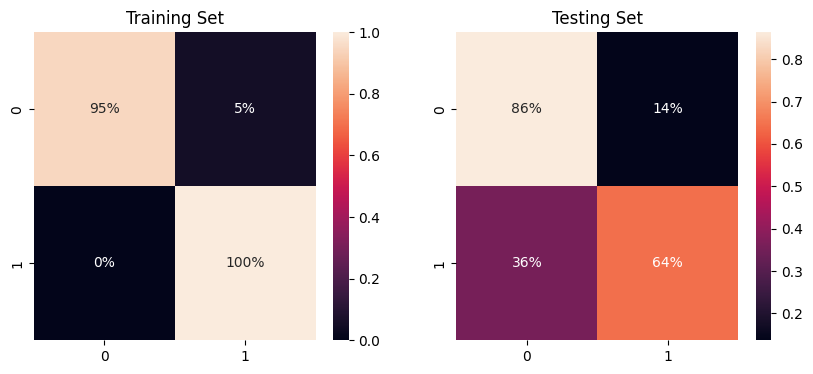

In [69]:
from sklearn.ensemble import RandomForestClassifier

modelR = RandomForestClassifier(n_estimators=50)

training = modelR.fit(X_train, y_train)   # training of a model
y_train_pred = modelR.predict(X_train)    # apply model for train prediction

print("EVALUATION OF DECISION TREE ON TRAINING SET:")
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

y_test_pred = modelR.predict(X_test)    # apply model for train prediction
print("EVALUATION OF DECISION TREE ON TESTING SET:")
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

confusion_matrix_train = confusion_matrix(y_train, y_train_pred, normalize='true')
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, normalize='true')

sns.heatmap(confusion_matrix_train, annot=True, fmt='.0%', ax=ax1)
ax1.set_title('Training Set')

sns.heatmap(confusion_matrix_test, annot=True, fmt='.0%', ax=ax2)
ax2.set_title('Testing Set')

<h1>Now let's compare the classifier techniques that we know

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
models = []
models.append(('DT', DecisionTreeClassifier(criterion='entropy', random_state=15)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=50)))

from sklearn.model_selection import cross_val_score
results = []
average_results=[]
names=[]

for name, model in models:
  result_one_model = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  results.append(result_one_model)
  average_results.append(result_one_model.mean())
  names.append(name)
  print("Accuracy %s: %f" % (name, result_one_model.mean()))

Accuracy DT: 0.769091
Accuracy kNN: 0.703636
Accuracy NB: 0.620000
Accuracy RF: 0.815455


<BarContainer object of 4 artists>

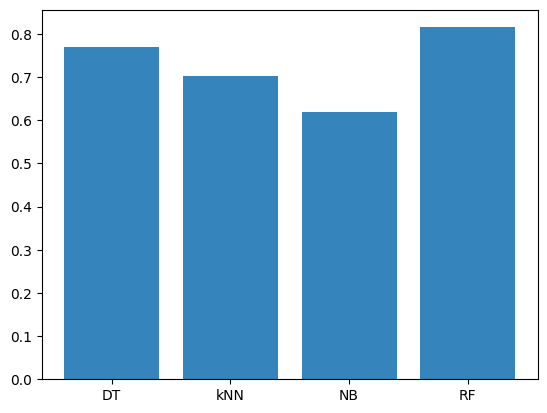

In [71]:
from matplotlib import pyplot
#fig = pyplot.figure()
pyplot.bar(names, average_results, alpha=0.9)

EVALUATION OF DT TRAINING SET:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        38
        True       0.94      1.00      0.97        34

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

EVALUATION OF DT ON TESTING SET:
              precision    recall  f1-score   support

       False       0.86      0.82      0.84        22
        True       0.73      0.79      0.76        14

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



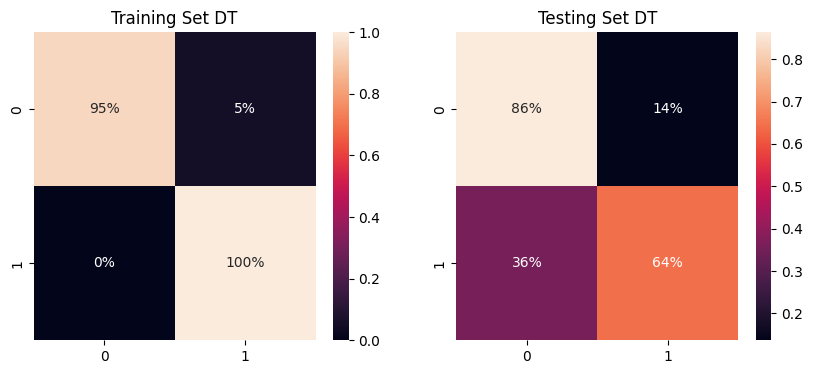

EVALUATION OF kNN TRAINING SET:
              precision    recall  f1-score   support

       False       0.79      0.61      0.69        38
        True       0.65      0.82      0.73        34

    accuracy                           0.71        72
   macro avg       0.72      0.71      0.71        72
weighted avg       0.73      0.71      0.71        72

EVALUATION OF kNN ON TESTING SET:
              precision    recall  f1-score   support

       False       0.72      0.82      0.77        22
        True       0.64      0.50      0.56        14

    accuracy                           0.69        36
   macro avg       0.68      0.66      0.66        36
weighted avg       0.69      0.69      0.69        36



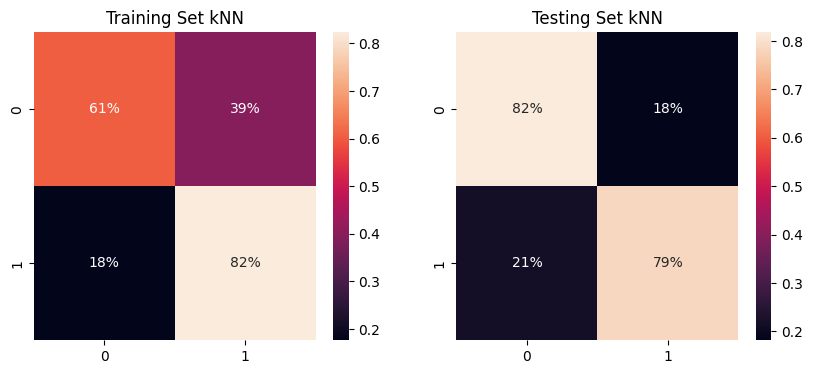

EVALUATION OF NB TRAINING SET:
              precision    recall  f1-score   support

       False       1.00      0.76      0.87        38
        True       0.79      1.00      0.88        34

    accuracy                           0.88        72
   macro avg       0.90      0.88      0.87        72
weighted avg       0.90      0.88      0.87        72

EVALUATION OF NB ON TESTING SET:
              precision    recall  f1-score   support

       False       0.79      0.50      0.61        22
        True       0.50      0.79      0.61        14

    accuracy                           0.61        36
   macro avg       0.64      0.64      0.61        36
weighted avg       0.67      0.61      0.61        36



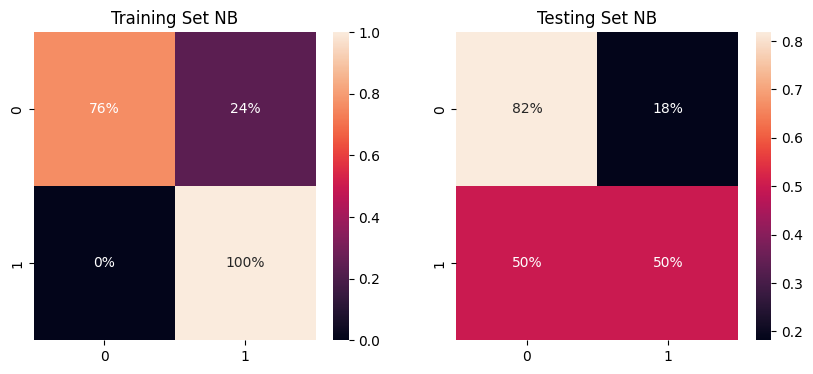

EVALUATION OF RF TRAINING SET:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        38
        True       0.94      1.00      0.97        34

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

EVALUATION OF RF ON TESTING SET:
              precision    recall  f1-score   support

       False       0.78      0.82      0.80        22
        True       0.69      0.64      0.67        14

    accuracy                           0.75        36
   macro avg       0.74      0.73      0.73        36
weighted avg       0.75      0.75      0.75        36



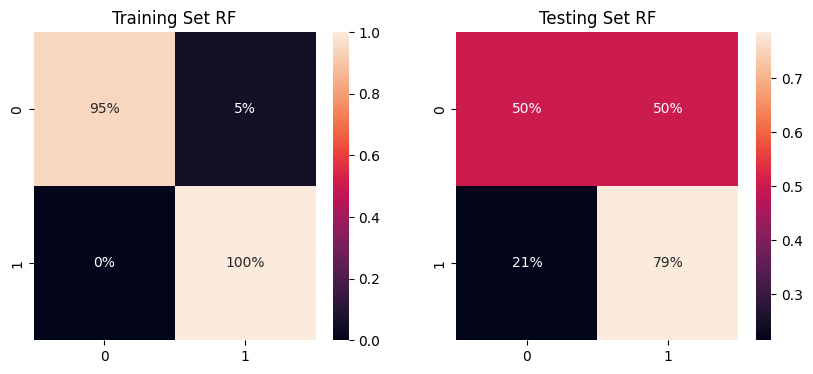

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = []
models.append(('DT', DecisionTreeClassifier(criterion='entropy', random_state=15)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=50)))

from sklearn.model_selection import cross_val_score
results = []
average_results=[]
names=[]

for name, model in models:
  training = model.fit(X_train, y_train)   # training of a model
  y_train_pred = model.predict(X_train)    # apply model for train prediction

  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  import matplotlib.pyplot as plt
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

  confusion_matrix_train = confusion_matrix(y_train, y_train_pred, normalize='true')
  confusion_matrix_test = confusion_matrix(y_test, y_test_pred, normalize='true')

  sns.heatmap(confusion_matrix_train, annot=True, fmt='.0%', ax=ax1)
  ax1.set_title('Training Set ' + name)

  sns.heatmap(confusion_matrix_test, annot=True, fmt='.0%', ax=ax2)
  ax2.set_title('Testing Set ' + name)

  print("EVALUATION OF " + name + " TRAINING SET:")
  from sklearn.metrics import classification_report
  print(classification_report(y_train, y_train_pred))

  y_test_pred = model.predict(X_test)    # apply model for train prediction
  print("EVALUATION OF " + name + " ON TESTING SET:")
  print(classification_report(y_test, y_test_pred))
  plt.show()


[Text(1, 0, 'DT'), Text(2, 0, 'kNN'), Text(3, 0, 'NB'), Text(4, 0, 'RF')]

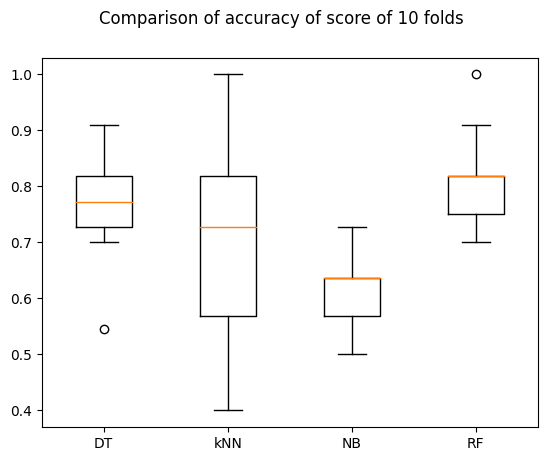

In [72]:
fig = pyplot.figure()
fig.suptitle('Comparison of accuracy of score of 10 folds')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

In [109]:
juniorDSAndAi.iloc[0, :]

work_year                     2022
employment_type                 FT
job_title             AI Developer
salary_in_usd               300000
employee_residence              IN
remote_ratio                    50
company_location                IN
company_size                     L
high_salary                   True
Name: 83, dtype: object

In [114]:
predict_data = X.iloc[0, :].copy()
predict_data['employee_residence_IN'] = 0
predict_data['remote_ratio'] = 0
predict_data['company_location_IN'] = 0
predict_data['company_size_L'] = 0

predict_data['employee_residence_UA'] = 1
predict_data['company_location_US'] = 1
predict_data['company_size_L'] = 1

predict_data.values

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [115]:
if modelD.predict(predict_data.values.reshape(1, -1)):
  print('You are going to have high salary!!')
else:
  print('You going to have above mean salary!!')

You going to have above mean salary!!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [116]:
if modelR.predict(predict_data.values.reshape(1, -1)):
  print('You are going to have high salary!!')
else:
  print('You going to have above mean salary!!')

You are going to have high salary!!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


We can see, that one model with DeccisionTreeClassifier preddicted for me a above mean sallary if I'm going to work in USA, but RandomForestClassifier preddicted a high salary for me. As we can see for comparison the RandomForestClassifier is the better in predicton as DeccisionTreeClassifier, so the high salary prediction is more accurate